In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")


In [2]:
BASE = Path(r"C:\Users\SANDHYA\OneDrive\Desktop\SRI@UE\visualization\airbnb_tourism_project\data")

barcelona_path = BASE / "barcelona"
melbourne_path = BASE / "melbourne"
sydney_path = BASE / "sydney"

barcelona_df = pd.read_csv(barcelona_path / "airbnb_dataset.csv")
melbourne_df = pd.read_csv(melbourne_path / "listings_summary_dec18.csv")
sydney_df = pd.read_csv(sydney_path / "listings_summary_dec18.csv")

barcelona_df.shape, melbourne_df.shape, sydney_df.shape


((82031, 18), (22895, 16), (36662, 16))

In [3]:
barcelona_df["city"] = "Barcelona"
melbourne_df["city"] = "Melbourne"
sydney_df["city"] = "Sydney"


In [4]:
common_cols = [
    "price",
    "room_type",
    "number_of_reviews",
    "reviews_per_month",
    "city"
]

barcelona_df = barcelona_df[common_cols]
melbourne_df = melbourne_df[common_cols]
sydney_df = sydney_df[common_cols]


In [5]:
df = pd.concat(
    [barcelona_df, melbourne_df, sydney_df],
    ignore_index=True
)

df["city"].value_counts()


city
Barcelona    82031
Sydney       36662
Melbourne    22895
Name: count, dtype: int64

In [7]:
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)



In [8]:
df["tourism_pressure"] = df["reviews_per_month"].fillna(0)


 ANALYSIS 1  
 how  do prices differ across cities?
 VISUALIZATION 1 BOXPLOT

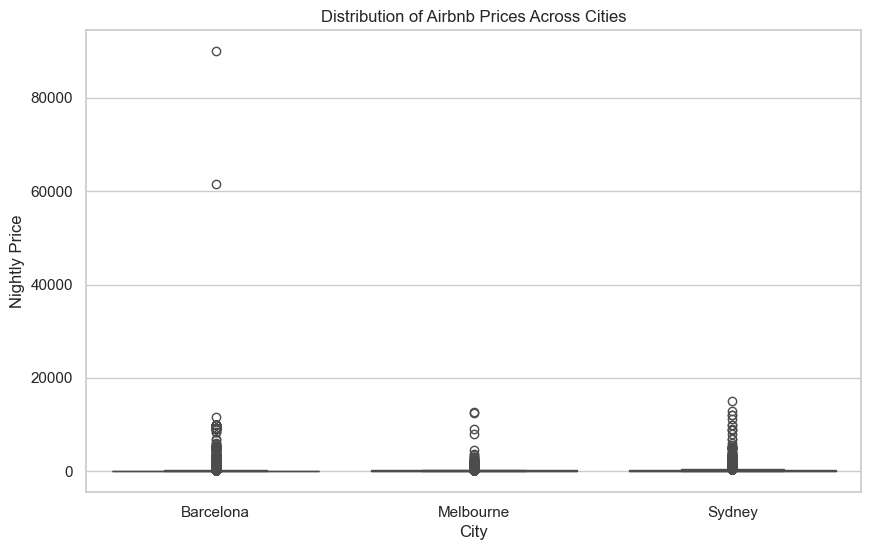

In [12]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x="city",
    y="price"
)

plt.title("Distribution of Airbnb Prices Across Cities")
plt.xlabel("City")
plt.ylabel("Nightly Price")

plt.show()


 ANALYSIS 2  
 HOW DO TOURISM PRICES DIFFER ACROSS CITIES ? 
 VISUALIZATION 2 BAR CHART

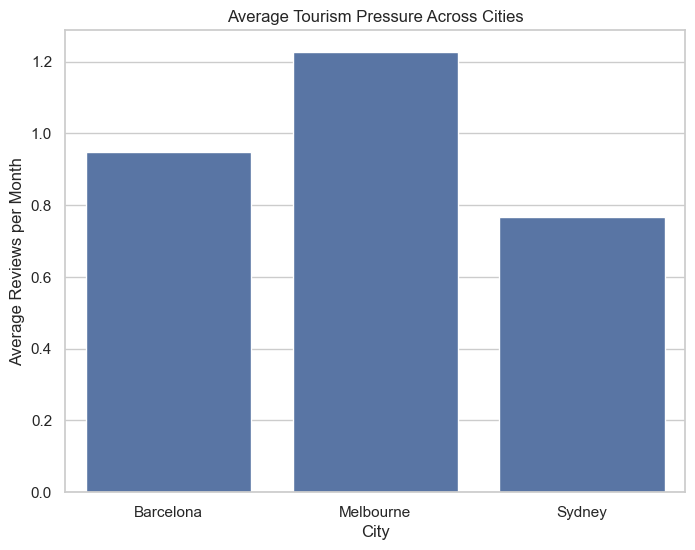

In [13]:
avg_pressure = (
    df.groupby("city")["tourism_pressure"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,6))

sns.barplot(
    data=avg_pressure,
    x="city",
    y="tourism_pressure"
)

plt.title("Average Tourism Pressure Across Cities")
plt.xlabel("City")
plt.ylabel("Average Reviews per Month")

plt.show()


 ANALYSIS 3  
 IS TOURISM PRESSURE RELATED TO PRICES ? 
 VISUALIZATION 3 HEXBIN PLOT

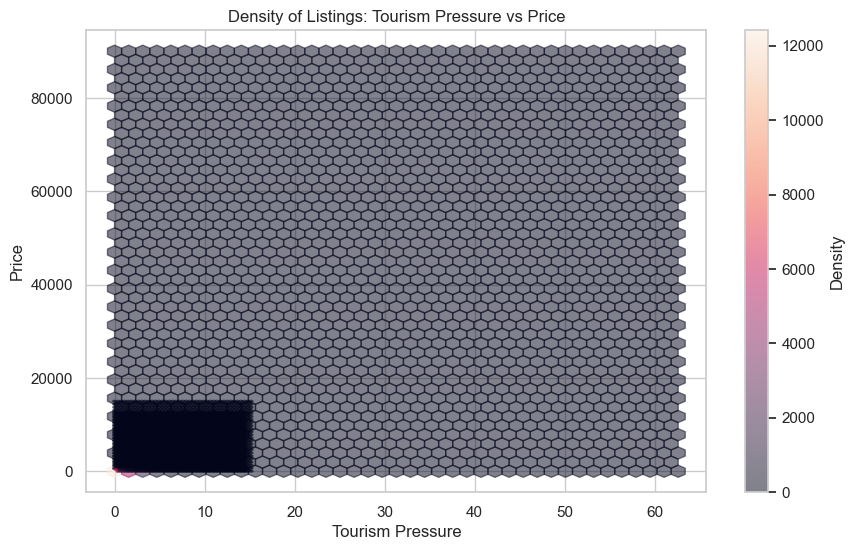

In [14]:
plt.figure(figsize=(10,6))

for city in df["city"].unique():
    subset = df[df["city"] == city]
    plt.hexbin(
        subset["tourism_pressure"],
        subset["price"],
        gridsize=40,
        alpha=0.5
    )

plt.colorbar(label="Density")

plt.title("Density of Listings: Tourism Pressure vs Price")
plt.xlabel("Tourism Pressure")
plt.ylabel("Price")

plt.show()


In [ ]:
 ANALYSIS 4 
 HOW DO ROOM TYPES DIFFER ACROOS CITIES ?
 VISUALIZATION 4 STACKED BAR CHART

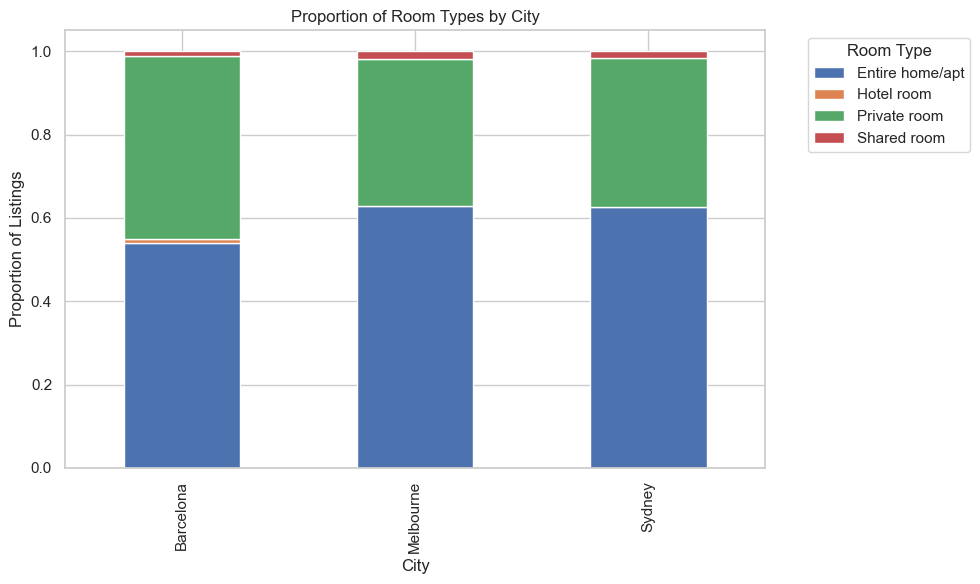

In [15]:
room_city = (
    df.groupby(["city", "room_type"])
      .size()
      .unstack(fill_value=0)
)

room_city_pct = room_city.div(room_city.sum(axis=1), axis=0)

room_city_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Proportion of Room Types by City")
plt.xlabel("City")
plt.ylabel("Proportion of Listings")

plt.legend(title="Room Type", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


Analysis Question 5

How does the number of reviews differ across cities?

Type: KDE Density Plot .

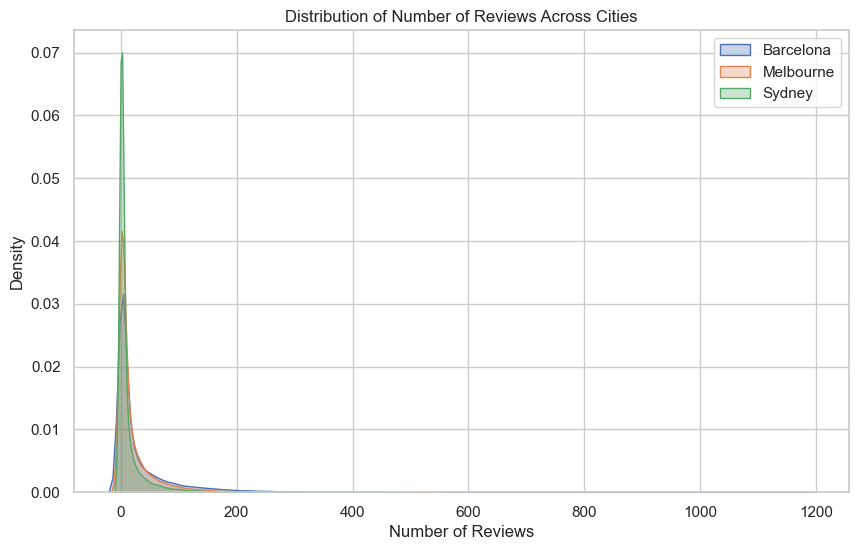

In [16]:
plt.figure(figsize=(10,6))

for city in df["city"].unique():
    sns.kdeplot(
        data=df[df["city"] == city],
        x="number_of_reviews",
        label=city,
        fill=True,
        alpha=0.3
    )

plt.title("Distribution of Number of Reviews Across Cities")
plt.xlabel("Number of Reviews")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
VISUALIZATION 6
Analysis Question 6
Do cities differ in price volatility?
Type: Line Plot of Standard Deviation

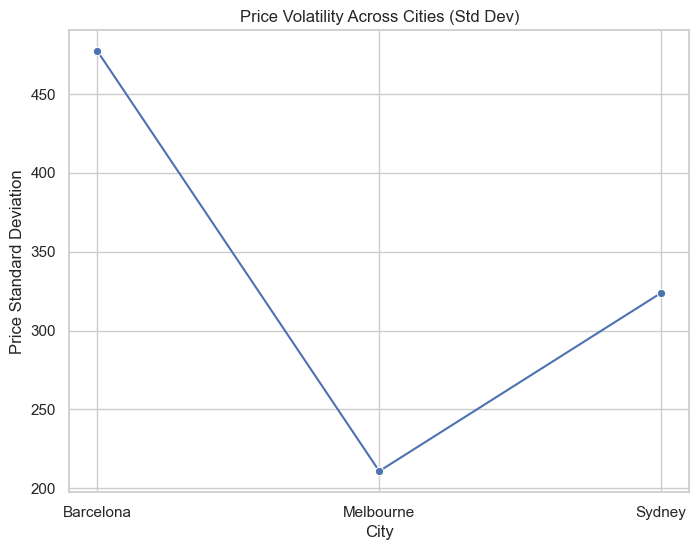

In [17]:
price_std = (
    df.groupby("city")["price"]
      .std()
      .reset_index()
)

plt.figure(figsize=(8,6))

sns.lineplot(
    data=price_std,
    x="city",
    y="price",
    marker="o"
)

plt.title("Price Volatility Across Cities (Std Dev)")
plt.xlabel("City")
plt.ylabel("Price Standard Deviation")

plt.show()


In [ ]:
VISUALIZATION 7
Analysis Question 7

What is the correlation between numeric variables in the dataset?

Type: Correlation Heatmap

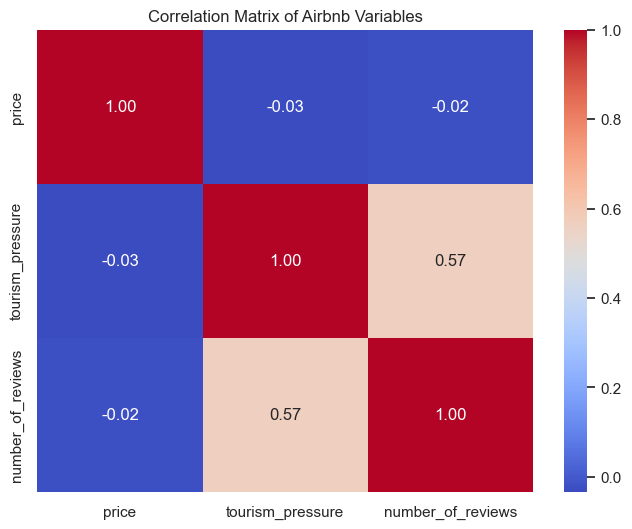

In [18]:
corr = df[[
    "price",
    "tourism_pressure",
    "number_of_reviews"
]].corr()

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix of Airbnb Variables")
plt.show()


VISUALIZATION 8 (FINAL VERSION)
Analysis Question 8

Which cities have the highest share of luxury (top-10%) listings?

Visualization Type: Waffle-Style Proportion Grid

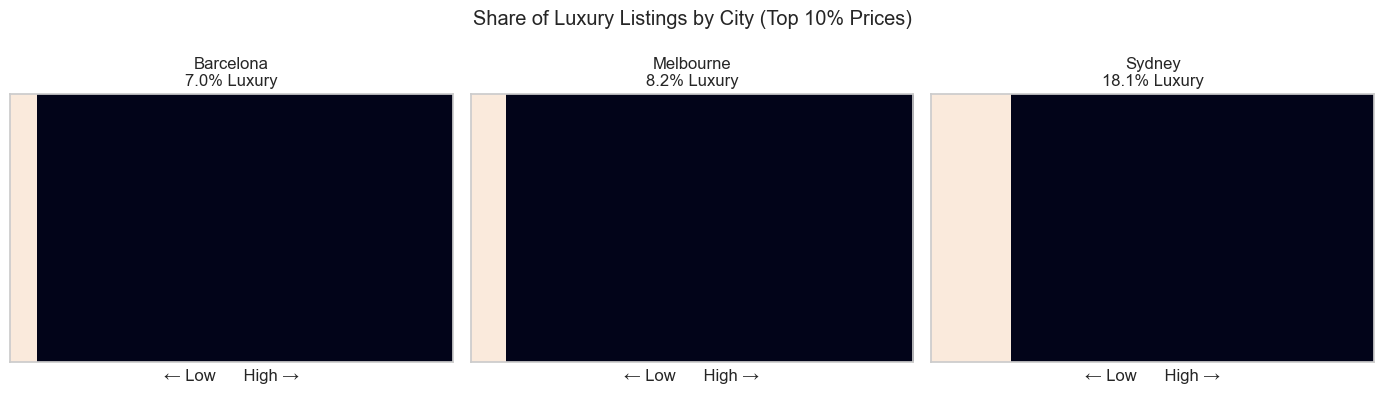

In [27]:
# Define luxury threshold
luxury_cutoff = df["price"].quantile(0.9)
df["luxury"] = df["price"] >= luxury_cutoff

luxury_share = (
    df.groupby("city")["luxury"]
      .mean()
      .reset_index()
)

# Convert proportions to 100-block waffle
blocks = 100

fig, axes = plt.subplots(1, len(luxury_share), figsize=(14,4))

for ax, (_, row) in zip(axes, luxury_share.iterrows()):
    filled = int(row["luxury"] * blocks)

    values = [1]*filled + [0]*(blocks - filled)

    ax.imshow(
        [values],
        aspect="auto"
    )

    ax.set_title(f"{row['city']}\n{row['luxury']:.1%} Luxury")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("← Low      High →")

plt.suptitle("Share of Luxury Listings by City (Top 10% Prices)")
plt.tight_layout()
plt.show()


In [ ]:
NEW VISUALIZATION 9
Analysis Question 9

How does tourism pressure vary across room types and cities?

 Visualization Type: Bubble Grid (Two-Dimensional Encoding)

• X = room type
• Y = city
• Bubble size = mean tourism pressure

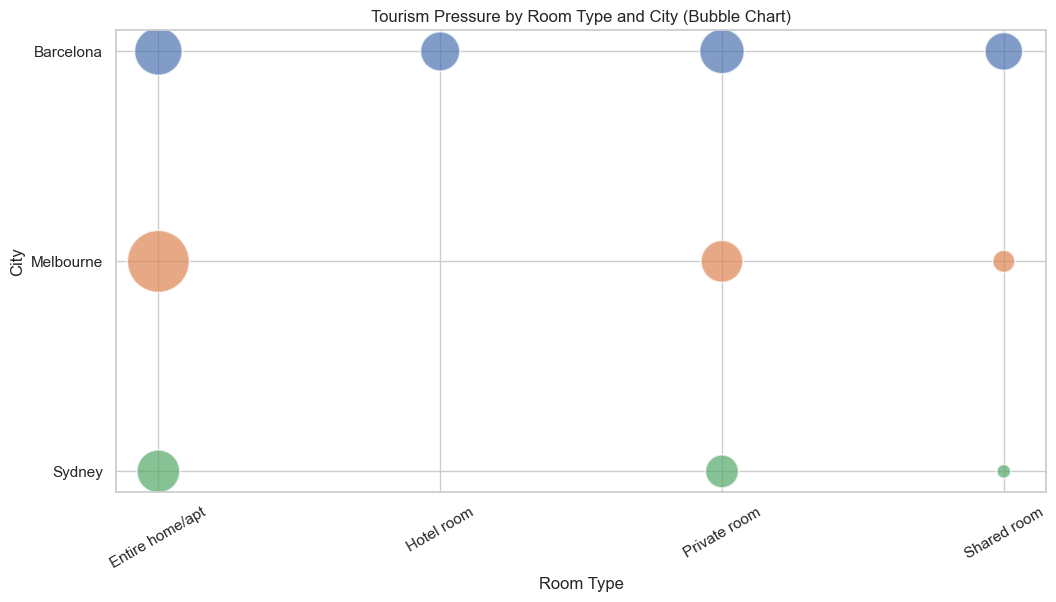

In [22]:
room_pressure = (
    df.groupby(["city", "room_type"])["tourism_pressure"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=room_pressure,
    x="room_type",
    y="city",
    size="tourism_pressure",
    hue="city",
    sizes=(100, 2000),
    alpha=0.7,
    legend=False
)

plt.title("Tourism Pressure by Room Type and City (Bubble Chart)")
plt.xlabel("Room Type")
plt.ylabel("City")

plt.xticks(rotation=30)

plt.show()


In [ ]:
VISUALIZATION 10
Analysis Question 10
WHICH CITIES SHOW THE GREATEST INEQUALITY IN PRICES?
Type: Lorenz-Style Curve 

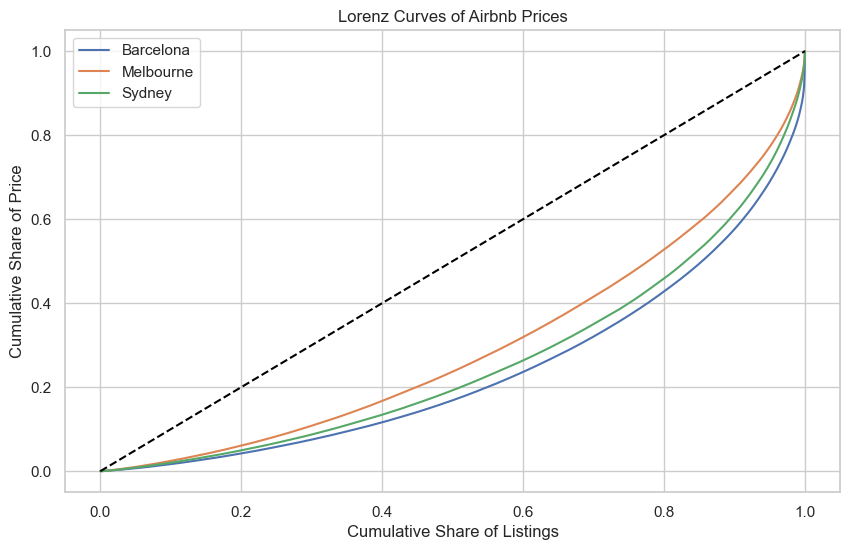

In [25]:
import numpy as np
plt.figure(figsize=(10,6))

for city in df["city"].unique():
    prices = np.sort(df[df["city"] == city]["price"].dropna())
    cum_prices = prices.cumsum() / prices.sum()
    cum_pop = np.linspace(0, 1, len(prices))

    plt.plot(cum_pop, cum_prices, label=city)

plt.plot([0,1],[0,1], linestyle="--", color="black")

plt.title("Lorenz Curves of Airbnb Prices")
plt.xlabel("Cumulative Share of Listings")
plt.ylabel("Cumulative Share of Price")
plt.legend()
plt.show()
